In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Nauryzbai district.csv')
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,NaN,NaN,NaN,NaN
1,2001,1 128 759,NaN,NaN,NaN,NaN
2,2002,1 132 424,NaN,NaN,NaN,NaN
3,2003,1 149 641,NaN,NaN,NaN,NaN
4,2004,1 175 208,NaN,NaN,NaN,NaN
5,2005,1 209 485,NaN,NaN,NaN,NaN
6,2006,1 247 896,NaN,NaN,NaN,NaN
7,2007,1 287 246,NaN,NaN,NaN,NaN
8,2008,1 324 739,NaN,NaN,NaN,NaN
9,2009,1 361 877,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_6650/3957259955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_6650/3957259955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_6650/3957259955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
15,2015,1641444,91172,-8.0,1.125,260.000
16,2016,1702766,97883,-22.0,1.667,336.000
17,2017,1751308,107593,44.0,1.938,390.000
18,2018,1801993,118036,13.0,2.404,474.000
19,2019,1854656,128169,-5.0,2.712,545.000
20,2020,1916822,141150,8.0,3.005,763.000
21,2021,1977258,152399,-18.0,3.810,1.149
22,2022,2101485,166552,94.0,3.967,680.000
23,2023,2161902,181376,340.0,4.453,686.000


/tmp/ipykernel_6650/2371986125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


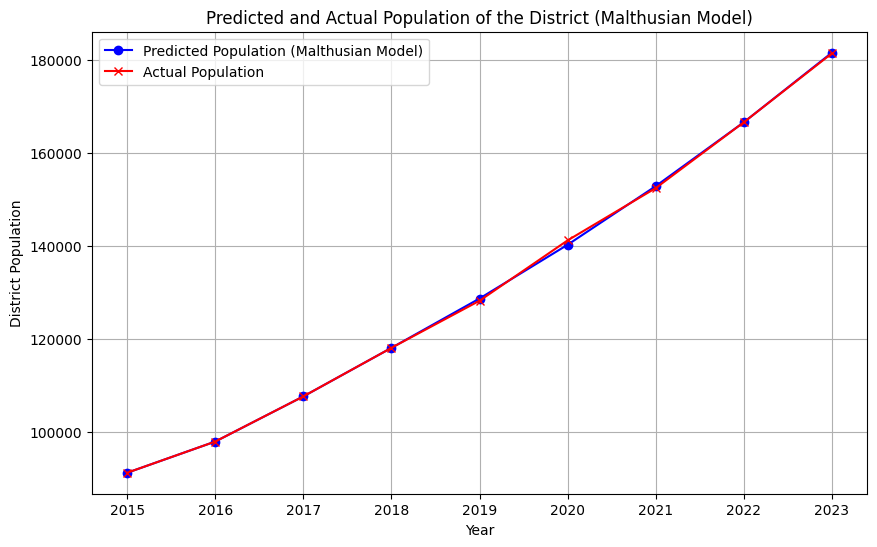

MSE: 260996.14307094482
R2: 0.9992508288330806


In [4]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2018]['District Population']
y_test = df[df.index.year > 2018]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2019, 2024) - 2018
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2015, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
    plt.xlabel('Year')
    plt.ylabel('District Population')
    plt.title('Predicted and Actual Population of the District (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


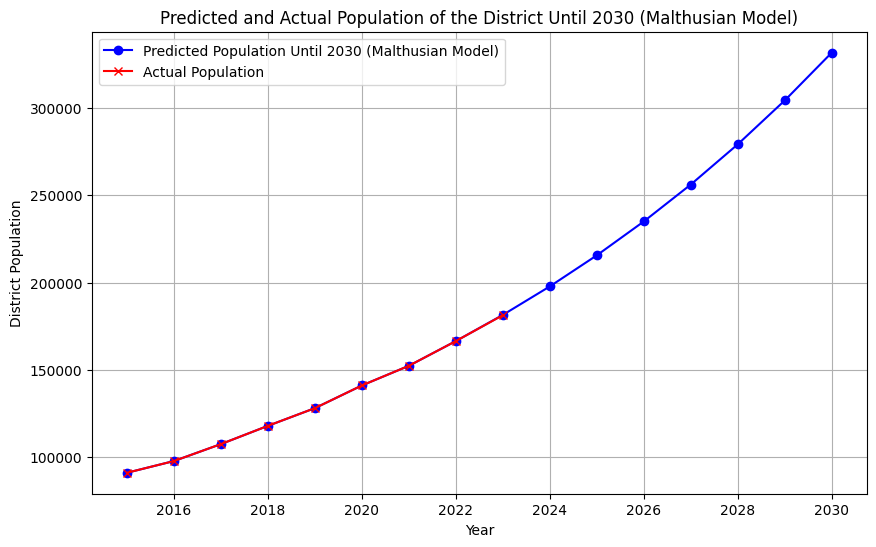

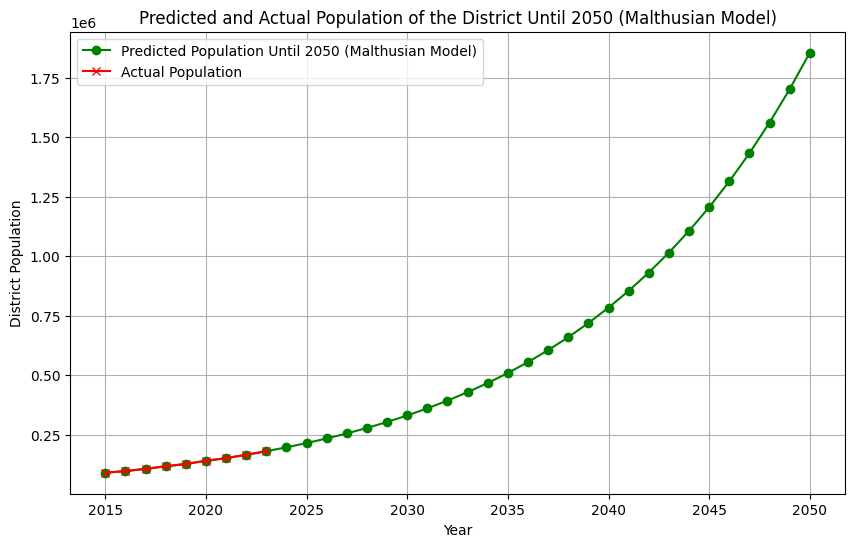

In [5]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)

years_full_2030 = np.arange(2015, 2031)
years_full_2050 = np.arange(2015, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# Chart Until 2030
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()

# Chart Until 2050
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2050 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2050 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nPredicted Population Until 2050 (Malthusian Model)")
print(forecast_df_2050)


Predicted Population Until 2030 (Malthusian Model)
    Year  Predicted District Population
0   2023                   1.815241e+05
1   2024                   1.978420e+05
2   2025                   2.156269e+05
3   2026                   2.350105e+05
4   2027                   2.561365e+05
5   2028                   2.791617e+05
6   2029                   3.042567e+05
7   2030                   3.316076e+05
8   2031                   3.614172e+05
9   2032                   3.939065e+05
10  2033                   4.293164e+05
11  2034                   4.679095e+05
12  2035                   5.099718e+05
13  2036                   5.558153e+05
14  2037                   6.057799e+05
15  2038                   6.602360e+05
16  2039                   7.195874e+05
17  2040                   7.842741e+05
18  2041                   8.547758e+05
19  2042                   9.316151e+05
20  2043                   1.015362e+06
21  2044                   1.106637e+06
22  2045                   1

In [7]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

17:00:58 - cmdstanpy - INFO - Chain [1] start processing


17:01:03 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


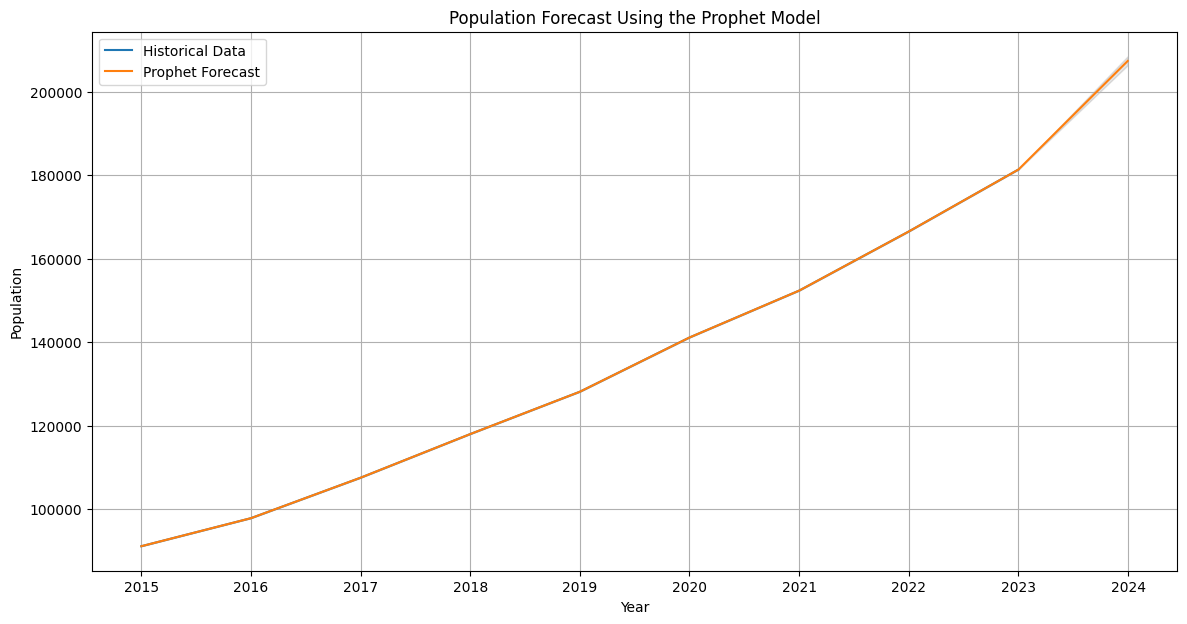

In [10]:
from prophet import Prophet
import matplotlib.pyplot as plt

df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})

model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


17:03:08 - cmdstanpy - INFO - Chain [1] start processing


17:03:13 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


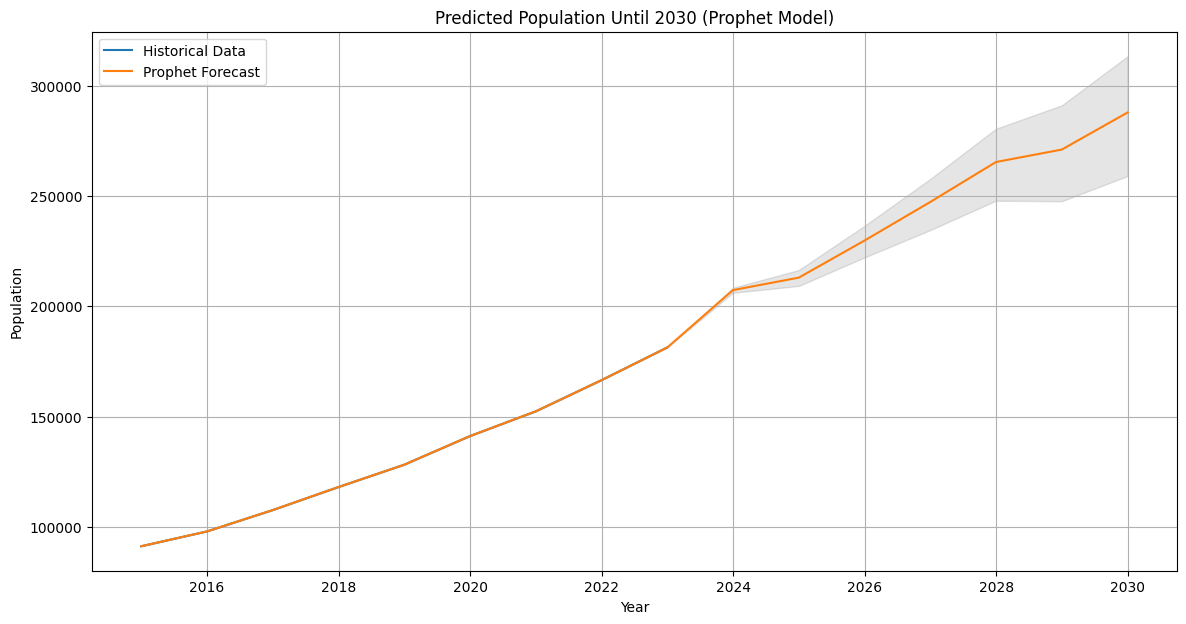

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2030 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


17:04:01 - cmdstanpy - INFO - Chain [1] start processing


17:04:06 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


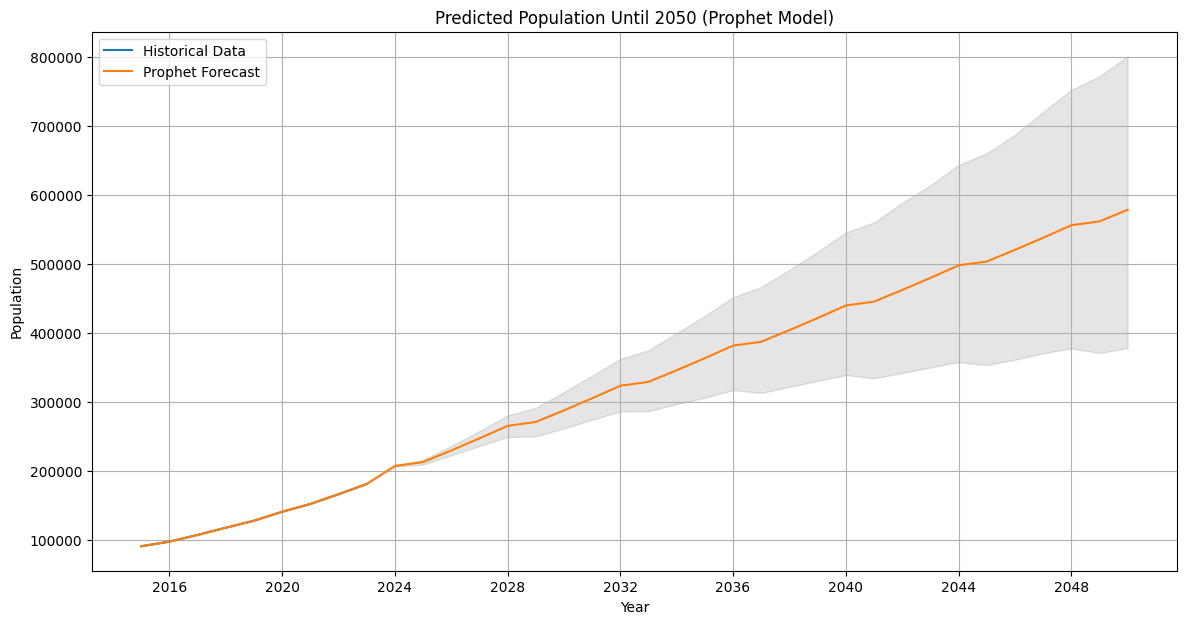

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]


forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30))  


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2015          91172.449961   91172.449955   91172.449968
2016          97883.432902   97883.432896   97883.432909
2017         107593.447789  107593.447782  107593.447795
2018         118036.423153  118036.423147  118036.423159
2019         128169.397367  128169.397361  128169.397373
2020         141150.370670  141150.370664  141150.370676
2021         152399.384279  152399.384273  152399.384285
2022         166552.359907  166552.359901  166552.359914
2023         181376.335129  181376.335122  181376.335135
2023         207377.243630  206259.043431  208466.275647
2024         213034.190326  209370.719415  216349.593168
2025         229862.711624  222968.732353  236344.720368
2026         247351.511989  236368.882006  257939.810334
2027         265494.097954  249444.370080  280518.947346
2028         271151.044649  250278.178127  291597.659843
2029         287979.565948  261

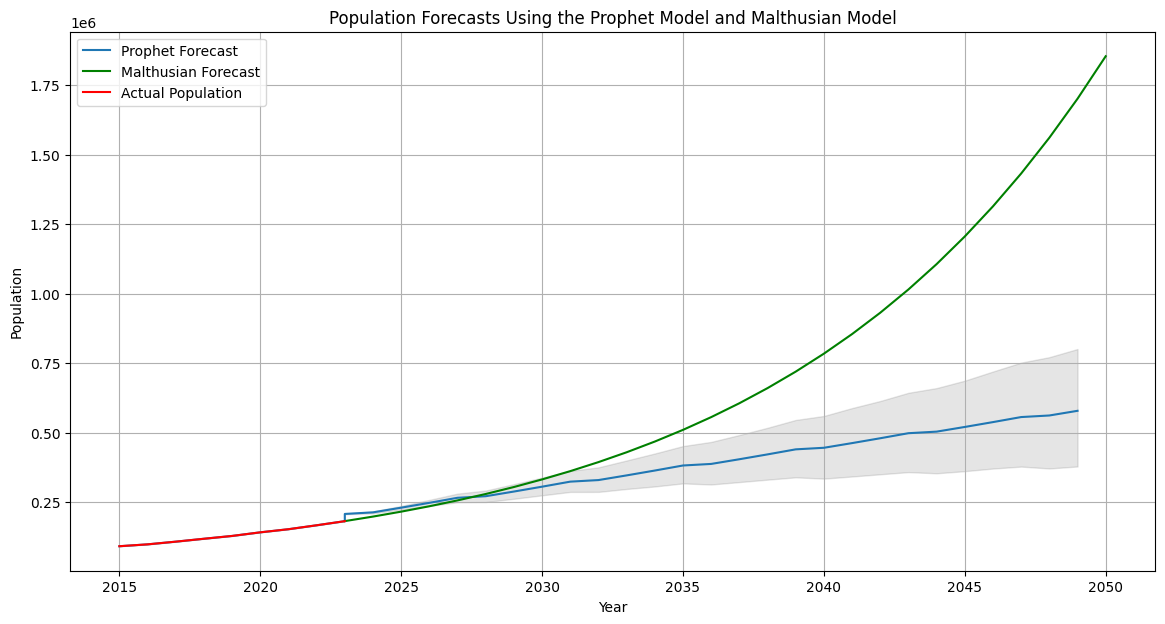

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Forecast')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthusian Forecast', color='green')
plt.plot(df.index.year, df['District Population'], label='Actual Population', color='red')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
